# Question 1: Chillers COP as a Quadratic Function

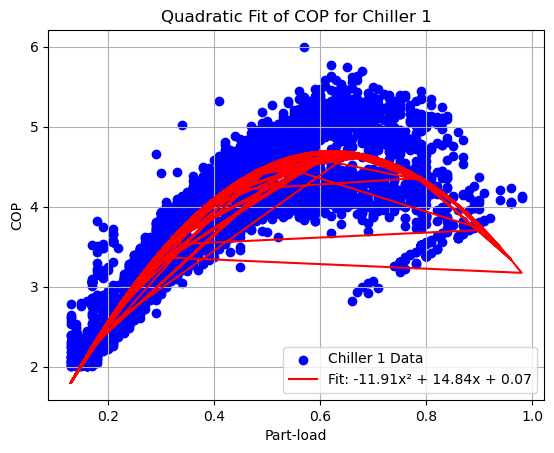

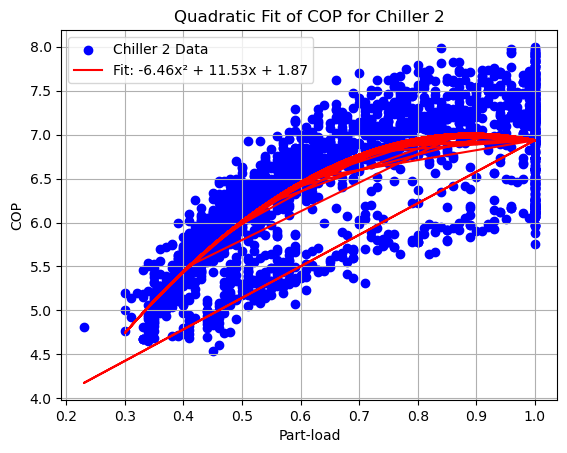

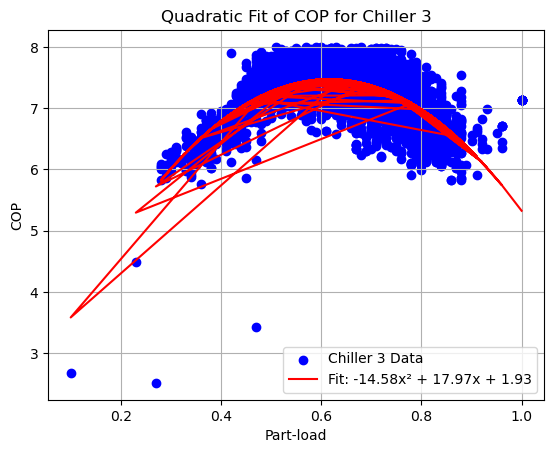

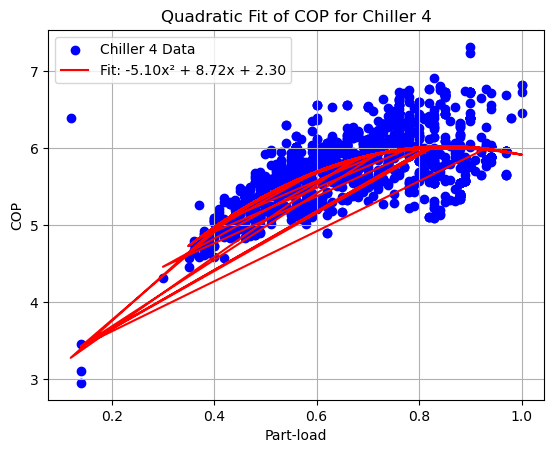

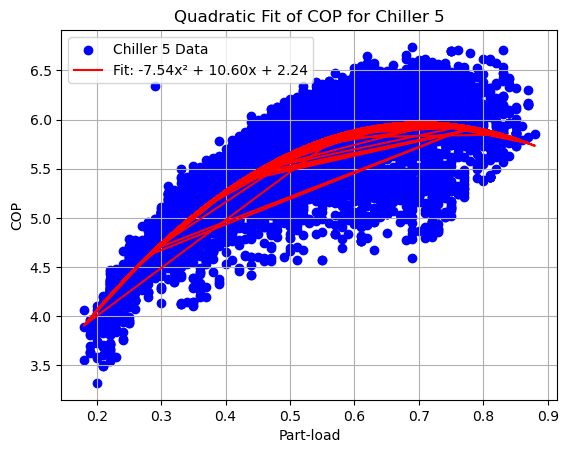

{'Chiller 1': array([-11.91430163,  14.84415802,   0.06763906]), 'Chiller 2': array([-6.46428593, 11.53345535,  1.8657219 ]), 'Chiller 3': array([-14.57564281,  17.96797493,   1.93307002]), 'Chiller 4': array([-5.10378321,  8.71768632,  2.30096335]), 'Chiller 5': array([-7.54132959, 10.60373544,  2.24178958])}


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file and parse the sheet with chiller data
file_path = "PartLoad Efficiency.xlsx"  # Replace with your file path if different
excel_data = pd.ExcelFile(file_path)
chillers_data = excel_data.parse("Chillers")

# Initialize a dictionary to store the results for all chillers
chillers_coefficients = {}

# Define the chiller columns to process (every 3rd column starting from Chiller 1 COP)
columns = [0, 3, 6, 9, 12]

for idx, col_start in enumerate(columns, start=1):
    # Extract COP and Part-load data for the current chiller
    chiller_data = chillers_data.iloc[:, [col_start, col_start + 1]]
    chiller_data.columns = ["COP", "Part-load"]

    # Clean and prepare the data
    chiller_data = chiller_data.dropna()
    chiller_data["COP"] = pd.to_numeric(chiller_data["COP"], errors="coerce")
    chiller_data["Part-load"] = pd.to_numeric(
        chiller_data["Part-load"], errors="coerce"
    )
    chiller_data = chiller_data.dropna()

    # Fit a quadratic polynomial to the data
    x = chiller_data["Part-load"]
    y = chiller_data["COP"]
    coefficients = np.polyfit(x, y, 2)

    # Store the coefficients
    chillers_coefficients[f"Chiller {idx}"] = coefficients

    # Plot the data and the fitted curve
    plt.scatter(x, y, label=f"Chiller {idx} Data", color="blue")
    plt.plot(
        x,
        np.poly1d(coefficients)(x),
        label=f"Fit: {coefficients[0]:.2f}x² + {coefficients[1]:.2f}x + {coefficients[2]:.2f}",
        color="red",
    )
    plt.xlabel("Part-load")
    plt.ylabel("COP")
    plt.title(f"Quadratic Fit of COP for Chiller {idx}")
    plt.legend()
    plt.grid()
    plt.show()

# Print the coefficients for all chillers
print(chillers_coefficients)


# Question 1: Boilers COP as a Quadratic Function

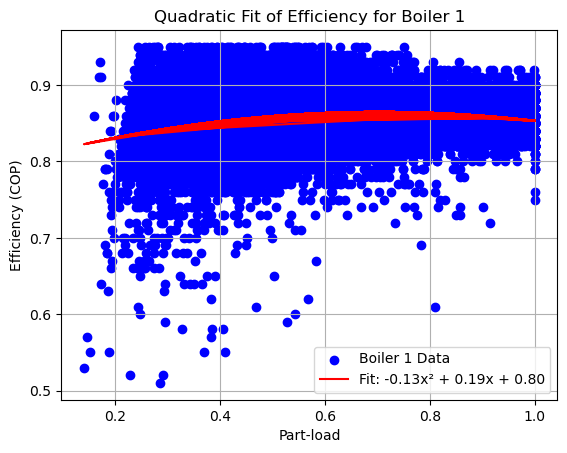

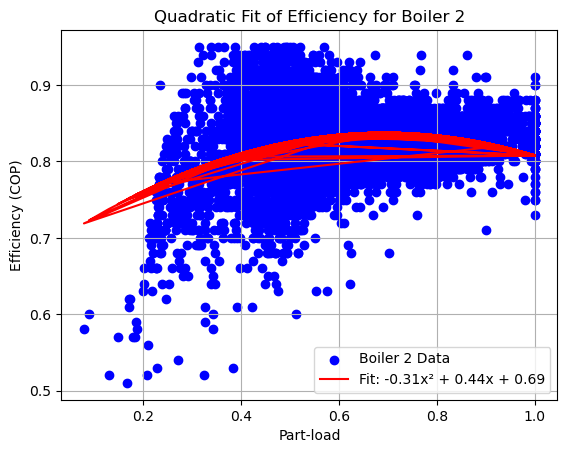

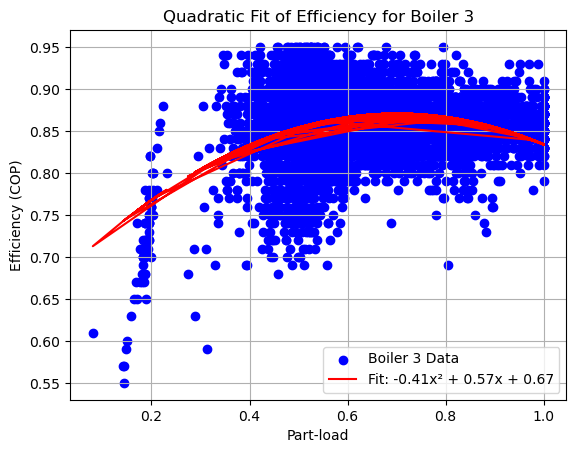

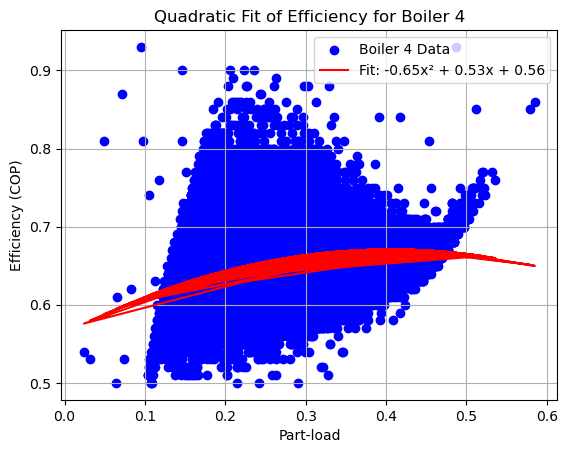

{'Boiler 1': array([-0.13299213,  0.18710272,  0.79905038]), 'Boiler 2': array([-0.31484385,  0.43607451,  0.68662317]), 'Boiler 3': array([-0.40952987,  0.5743578 ,  0.66918333]), 'Boiler 4': array([-0.64926345,  0.52714733,  0.56367035])}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file and parse the sheet with boiler data
file_path = "PartLoad Efficiency.xlsx"  # Replace with your file path if different
excel_data = pd.ExcelFile(file_path)
boilers_data = excel_data.parse("Boilers")

# Initialize a dictionary to store the results for all boilers
boilers_coefficients = {}

# Define the boiler columns to process (every 3rd column starting from Boiler 1 Efficiency)
columns = [0, 3, 6, 9]

for idx, col_start in enumerate(columns, start=1):
    # Extract Efficiency and Part-load data for the current boiler
    boiler_data = boilers_data.iloc[:, [col_start, col_start + 1]]
    boiler_data.columns = ["Efficiency", "Part-load"]

    # Clean and prepare the data
    boiler_data = boiler_data.dropna()
    boiler_data["Efficiency"] = pd.to_numeric(
        boiler_data["Efficiency"], errors="coerce"
    )
    boiler_data["Part-load"] = pd.to_numeric(boiler_data["Part-load"], errors="coerce")
    boiler_data = boiler_data.dropna()

    # Fit a quadratic polynomial to the data
    x = boiler_data["Part-load"]
    y = boiler_data["Efficiency"]
    coefficients = np.polyfit(x, y, 2)

    # Store the coefficients
    boilers_coefficients[f"Boiler {idx}"] = coefficients

    # Plot the data and the fitted curve
    plt.scatter(x, y, label=f"Boiler {idx} Data", color="blue")
    plt.plot(
        x,
        np.poly1d(coefficients)(x),
        label=f"Fit: {coefficients[0]:.2f}x² + {coefficients[1]:.2f}x + {coefficients[2]:.2f}",
        color="red",
    )
    plt.xlabel("Part-load")
    plt.ylabel("Efficiency (COP)")
    plt.title(f"Quadratic Fit of Efficiency for Boiler {idx}")
    plt.legend()
    plt.grid()
    plt.show()

# Print the coefficients for all boilers
print(boilers_coefficients)


# Question 2: Chillers

In [ ]:
import numpy as np
from scipy.optimize import minimize


# Define cost function: Quadratic Objective Function for optimization
def fun(x):
    numerator1 = x[0] * 3
    denominator1 = -18 * x[0] ** 2 + 36 * x[0] - 13.6

    numerator2 = x[1] * 3
    denominator2 = -48 * x[1] ** 2 + 96 * x[1] - 42.2

    return (numerator1 / denominator1) + (numerator2 / denominator2)


# Equality constraint
Aeq = np.array([3, 3])
beq = 5


def eq_constraint(x):
    return np.dot(Aeq, x) - beq


# Inequality constraints
A = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
b = np.array([1, 1, 0, 0])
ineq_constraints = [
    {"type": "ineq", "fun": lambda x, i=i: b[i] - np.dot(A[i], x)}
    for i in range(len(b))
]

# Initial guess
x0 = [0, 0]

# Optimized decision with trust-constr method and tighter tolerance
result = minimize(
    fun,
    x0,
    method="trust-constr",
    constraints=[{"type": "eq", "fun": eq_constraint}] + ineq_constraints,
    bounds=[(0, 1), (0, 1)],
    options={"xtol": 1e-9, "gtol": 1e-9, "maxiter": 1000},
)

x_optimized = np.round(result.x, 2)

print("Optimized x:", x_optimized);
